# Initial Library Import

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

# Importing Data

In [51]:
data = pd.read_csv("spam.csv",encoding='latin-1')

In [52]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Initial Data Lookup & Analysis

In [53]:
#Removing Empty Columns and Renaming Columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [54]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [56]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [57]:
#Count observations in each label
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [58]:
#Using Label Encoder to map Ham to 0 & Spam to 1
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label']) 

In [59]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(data["text"],data["label"], test_size = 0.2, random_state = 10)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


# Vectorizing Text

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

In [64]:
vect = CountVectorizer()

In [65]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

Getting all the possible words from texts

In [66]:
print(vect.get_feature_names()[0:50])
print(vect.get_feature_names()[-50:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07', '07046744435', '07090201529', '07090298926', '07099833605', '07123456789', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '078', '07801543489', '07808247860', '07808726822', '07815296484', '07821230901', '078498', '0796xxxxxx', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705']
['yours', 'yourself', 'youuuuu', 'youåõre', 'yoville', 'yowifes', 'yoyyooo', 'yr', 'yrs', 'ystrday', 'ything', 'yummmm', 'yummy', 'yun', 'yunny', 'yuo', 'yuou', 'yup', 'yupz', 'zac', 'zaher', 'zealand', 'zebra', 'zed', 'zeros', 'zhong', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zyada', 'åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï',

In [67]:
X_train_df = vect.transform(X_train)

Transforming the test data into vectors

In [68]:
X_test_df = vect.transform(X_test)

# Machine Learning Pipeline

### Checking All the Algorithms
Generally, Naive Bayes works well on text data. 

In [82]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pipeline = [MultinomialNB(), LogisticRegression(), KNeighborsClassifier(n_neighbors=5), RandomForestClassifier(), AdaBoostClassifier(), SVC(kernel='linear')]
modelNames = []
for model in pipeline:
    modelName = str(model)[0:str(model).index('(')]
    modelNames.append(modelName)
    model.fit(X_train_df,y_train)
    prediction[modelName] = model.predict(X_test_df)
    print(modelName +"    "+ str(accuracy_score(y_test,prediction[modelName])))

MultinomialNB    0.988340807175
LogisticRegression    0.980269058296
KNeighborsClassifier    0.912107623318
RandomForestClassifier    0.966816143498
AdaBoostClassifier    0.967713004484
SVC    0.983856502242


# Parameter Tuning using GridSearch

Based, on the above ML models, Naive Bayes gives the best accuracy. However, I am tuning the parameters of kNN for showcasing gridsearch

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
k_range = np.arange(1,10)

In [72]:
k_range

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
param_grid = dict(n_neighbors=k_range)

In [74]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_df,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [75]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [76]:
grid.best_params_

{'n_neighbors': 1}

In [77]:
grid.best_score_

0.94615212026026474

In [78]:
grid.grid_scores_

[mean: 0.94615, std: 0.00449, params: {'n_neighbors': 1},
 mean: 0.92259, std: 0.00288, params: {'n_neighbors': 2},
 mean: 0.92349, std: 0.00226, params: {'n_neighbors': 3},
 mean: 0.90554, std: 0.00117, params: {'n_neighbors': 4},
 mean: 0.90621, std: 0.00065, params: {'n_neighbors': 5},
 mean: 0.89410, std: 0.00060, params: {'n_neighbors': 6},
 mean: 0.89455, std: 0.00062, params: {'n_neighbors': 7},
 mean: 0.88580, std: 0.00141, params: {'n_neighbors': 8},
 mean: 0.88602, std: 0.00142, params: {'n_neighbors': 9}]

# Evaluation

In [86]:
for eachModel in modelNames:
    print(eachModel +" \n "+classification_report(y_test, prediction[eachModel], target_names = ["Ham", "Spam"]))

MultinomialNB 
              precision    recall  f1-score   support

        Ham       0.99      0.99      0.99       965
       Spam       0.97      0.95      0.96       150

avg / total       0.99      0.99      0.99      1115

LogisticRegression 
              precision    recall  f1-score   support

        Ham       0.98      1.00      0.99       965
       Spam       0.98      0.87      0.92       150

avg / total       0.98      0.98      0.98      1115

KNeighborsClassifier 
              precision    recall  f1-score   support

        Ham       0.91      1.00      0.95       965
       Spam       1.00      0.35      0.51       150

avg / total       0.92      0.91      0.89      1115

RandomForestClassifier 
              precision    recall  f1-score   support

        Ham       0.96      1.00      0.98       965
       Spam       1.00      0.75      0.86       150

avg / total       0.97      0.97      0.96      1115

AdaBoostClassifier 
              precision    recall  

### By checking the above confusion matrices, creating a heatmap for NB with seaborn

In [87]:
conf_mat = confusion_matrix(y_test, prediction['MultinomialNB'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

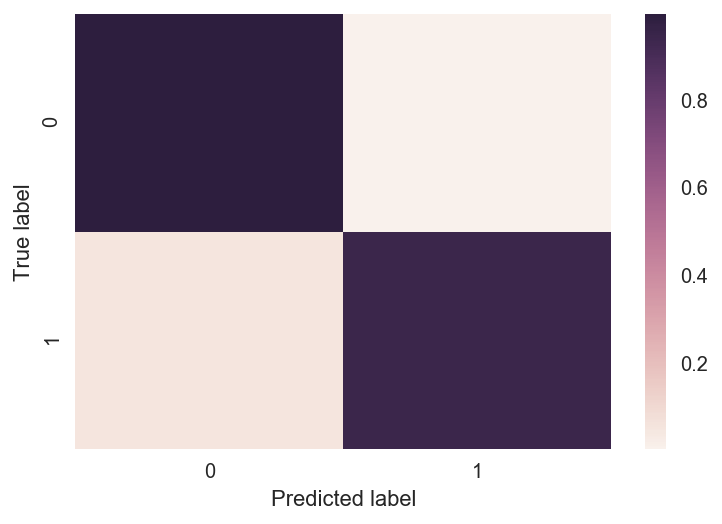

In [88]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Conclusion

In [89]:
print(conf_mat)

[[960   5]
 [  8 142]]


### Checking the above confusion matrix, it is obvious that 5 Ham are mis classified as Spam, and 8 Spam are misclassified as Ham.

In [90]:
pd.set_option('display.max_colwidth', -1)

To display the full string in text column

### Misclassified as Spam

In [91]:
X_test[y_test < prediction["MultinomialNB"] ]

573     Waiting for your call.                                                                                                      
4727    I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
5475    Dhoni have luck to win some big title.so we will win:)                                                                      
4860    Nokia phone is lovly..                                                                                                      
1259    We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us                           
Name: text, dtype: object

### Misclassfied as Ham

In [92]:
X_test[y_test > prediction["MultinomialNB"] ]

5035    You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt       
2574    Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.   
3130    LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.
68      Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"                                                                            
2662    Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?                          
4211    Missed call alert. These numbers called but left no message. 07008009200                                                                                    
3572    Yo

# So, The Accuracy is 98.8 with Naive Bayes.